In [5]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import parse_biclust,read_true_bics,read_all_results
from find_optimal_parameters import  plot_F1_heatmap,get_opt_params, F1_per_bic

%matplotlib inline

In [6]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../simulated_datasets/results/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [7]:
# predicted biclusters 
tool_name = "Plaid"
tool_suffix = "Plaid"
n_runs = 10


parameters = (("row_release",[0.5, 0.55,0.6, 0.65, 0.7]),
              ("col_release",[0.5, 0.55,0.6, 0.65, 0.7]),
              ("back_fit",[0,10,100]),
              ("iter_startup",[5, 10,100,1000]),
              ("iter_layer",[10,100,200,500,1000]))

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap+"."+tool_suffix+".biclust_results.txt"

img_outdir = out_dir + "/F1/img"
tsv_outdir = out_dir + "/F1/"

In [9]:
results= read_all_results(parameters,tool_name,n_runs=n_runs,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix)

results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

Parameter combiations not found: 0
Successfull parameter combinations: 1500
	files not found: 15414
	files empty: 0
	failed to parse: 0
Total runs 300000
Non-zero runs: 60662


In [10]:
parameters

(('row_release', [0.5, 0.55, 0.6, 0.65, 0.7]),
 ('col_release', [0.5, 0.55, 0.6, 0.65, 0.7]),
 ('back_fit', [0, 10, 100]),
 ('iter_startup', [5, 10, 100, 1000]),
 ('iter_layer', [10, 100, 200, 500, 1000]))

Total combinations: 1500
Total combinations: 1500
Combinations with mean F1 > 0.05 1164


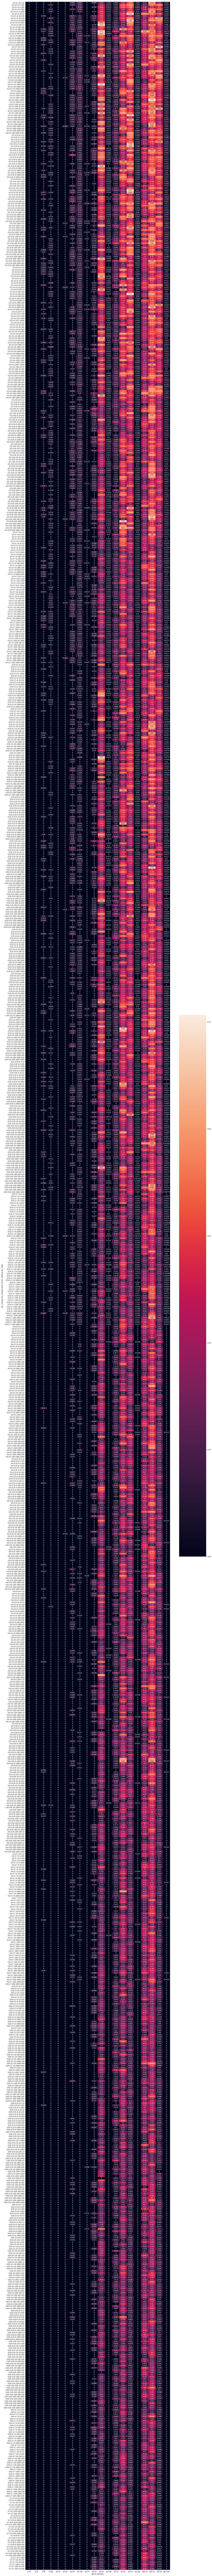

In [11]:
params = ["row_release","col_release","back_fit",'iter_startup','iter_layer']
plot_file = img_outdir+"/" + tool_name+".F1_heatmap.svg"
heatmap_outfile =  tsv_outdir+ tool_name+".F1_heatmap.tsv"

heatmap = plot_F1_heatmap(results,params,f1_thr=0.05,
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [12]:
parameters

(('row_release', [0.5, 0.55, 0.6, 0.65, 0.7]),
 ('col_release', [0.5, 0.55, 0.6, 0.65, 0.7]),
 ('back_fit', [0, 10, 100]),
 ('iter_startup', [5, 10, 100, 1000]),
 ('iter_layer', [10, 100, 200, 500, 1000]))

In [13]:
default_params = (0.7,0.7,0,5,10)

In [14]:
r = get_opt_params(results, params, default_params=default_params, more_n_smaples = 0)
r

All 300000 runs considered

Optimal parameters (max. avg. F1 per bicluster):
	row_release=0.5;
	col_release=0.5;
	back_fit=0;
	iter_startup=100;
	iter_layer=500;
	Max. avg. F1 per bicluster:0.189±0.319
	avg. F1 per best match:0.048±0.109
	biclusters per run:1.3±1.6
With default parameters:
	row_release=0.7;
	col_release=0.7;
	back_fit=0;
	iter_startup=5;
	iter_layer=10;
	avg. F1 per bicluster:0.038±0.138
	avg. F1 per best match:0.007±0.029
	biclusters per run:0.4±0.7


F1 per bicluster  \
                                                                     mean   
row_release col_release back_fit iter_startup iter_layer                    
0.5         0.50        0        100          500                0.189345   
                                 1000         10                 0.182523   
            0.55        100      10           1000               0.180430   
            0.50        100      10           500                0.178200   
                        10       5            200                0.174983   
            0.55        10       100          100                0.173311   
            0.60        100      10           1000               0.172338   
            0.50        10       100          500                0.171824   
                        100      100          10                 0.170804   
                        10       1000         200                0.169985   
            0.55        100      10           500                0.169508   
                        0        1000         100                0.168947   
                        100      1000         200                0.168829   
            0.50        10       5            1000               0.167923   
                                 100          100                0.166386   
            0.55        100      5            100                0.165991   
            0.60        100      1000         200                0.165314   
            0.50        100      100          100                0.164937   
            0.55        10       10           10                 0.164780   
            0.60        0        10           500                0.164023   
            0.50        10       100          1000               0.162832   
                        0        10           200                0.162772   
            0.55        100      1000         100                0.162392   
                                 100          1000               0.162361   
            0.60        0        100          200                0.162027   
            0.55        10       10           1000               0.162013   
            0.50        100      5            200                0.161901   
            0.55        10       100          1000               0.160978   
            0.50        0        10           10                 0.160718   
            0.55        0        100          10                 0.160518   
...                                                                   ...   
0.7         0.65        100      5            10                 0.029160   
            0.70        0        1000         10                 0.028889   
            0.55        0        1000         100                0.028723   
                        10       1000         100                0.028384   
            0.50        0        1000         500                0.028106   
            0.65        10       10           200                0.028009   
            0.55        10       5            10                 0.027798   
            0.65        10       100          500                0.027782   
            0.60        0        5            10                 0.027667   
            0.70        10       100          10                 0.027250   
                        100      100          1000               0.027237   
            0.50        100      100          100                0.025824   
            0.55        10       10           200                0.025789   
            0.60        10       100          10                 0.025641   
            0.70        100      1000         200                0.025572   
            0.65        10       5            1000               0.024909   
            0.60        10       10           1000               0.023930   
            0.65        0        1000         1000               0.023579   
            0.70        100      5            1000   